# 4. O Estado de Bell: Criando o Emaranhamento

Até agora, manipulamos qubits individualmente. Agora, vamos criar uma conexão fundamental entre dois qubits, gerando o famoso **Estado de Bell** ($|\Phi^+\rangle$).

A receita para o emaranhamento é simples: **Superposição + CNOT**.

In [85]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_state_qsphere
from qiskit_aer import AerSimulator

In [86]:
simulator = AerSimulator()

#### **Estado Inicial**
Começamos com dois qubits no estado fundamental $|0\rangle$.
$$|\psi_0\rangle = |00\rangle = \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}$$

#### **Superposição (Hadamard no $q_0$)**
Aplicamos a porta $H$ apenas no qubit 0. Isso o coloca em um estado de "50% 0" e "50% 1". O qubit 1 permanece inalterado.

$$|\psi_1\rangle = (I \otimes H) |00\rangle$$
$$|\psi_1\rangle = |0\rangle \otimes \left( \frac{|0\rangle + |1\rangle}{\sqrt{2}} \right)$$
$$|\psi_1\rangle = \frac{|00\rangle + |01\rangle}{\sqrt{2}}$$

> *Neste ponto, o sistema ainda é separável. Temos 50% de chance de medir $|00\rangle$ e 50% de $|01\rangle$. Note que o $q_1$ (esquerda) é sempre 0.*

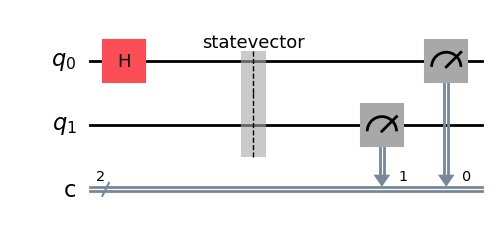

In [87]:
qc_antes_bell = QuantumCircuit(2, 2)
qc_antes_bell.h(0)

qc_antes_bell.save_statevector()

qc_antes_bell.measure(1, 1)
qc_antes_bell.measure(0, 0)

qc_antes_bell.draw('mpl')

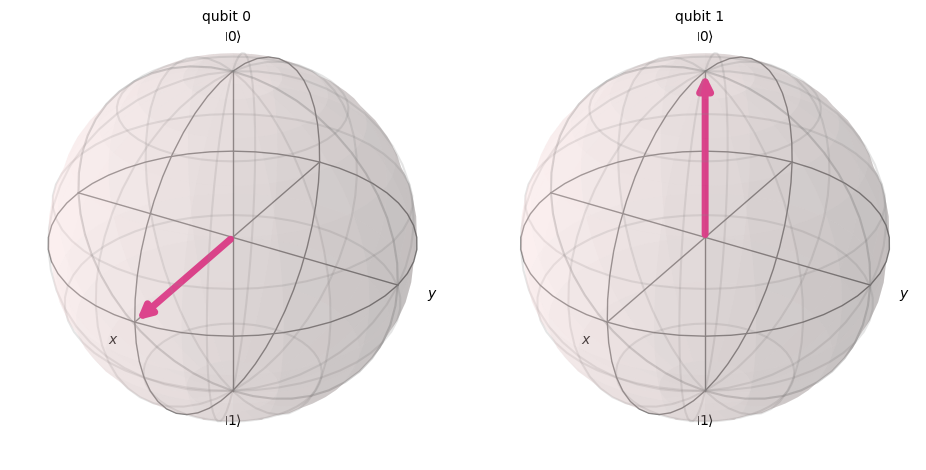

In [88]:
job_antes_bell = simulator.run(qc_antes_bell)
result_antes_bell = job_antes_bell.result()

state = result_antes_bell.data()['statevector']

display(plot_bloch_multivector(state))

#### **Emaranhamento (CNOT $q_0 \to q_1$)**
Agora aplicamos a porta Control-NOT.
* **Controle:** $q_0$ (direita).
* **Alvo:** $q_1$ (esquerda).

A regra do CNOT é: **"Se o controle for 1, inverta o alvo."**

Olhando para o nosso estado $|\psi_1\rangle$:
1.  Termo $|0\mathbf{0}\rangle$: O controle ($q_0$) é **0**. O alvo ($q_1$) não muda. $\to$ Fica $|00\rangle$.
2.  Termo $|0\mathbf{1}\rangle$: O controle ($q_0$) é **1**. O alvo ($q_1$) **inverte** de 0 para 1. $\to$ Vira $|11\rangle$.

#### **Resultado Final**
$$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ 0 \\ 0 \\ \frac{1}{\sqrt{2}} \end{bmatrix}$$

**O que isso significa?**
O sistema agora só existe em dois estados possíveis:
1.  Ambos são 0 ($|00\rangle$).
2.  Ambos são 1 ($|11\rangle$).

Não existe mais a possibilidade de medir $|01\rangle$ ou $|10\rangle$. Se você medir o $q_0$ e der **1**, você sabe **instantaneamente** que o $q_1$ também é **1**, sem nem precisar olhar para ele. Isso é a correlação perfeita do emaranhamento!


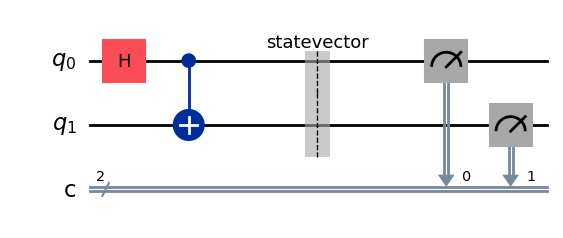

In [89]:
qc_bell = QuantumCircuit(2, 2)
qc_bell.h(0)
qc_bell.cx(0, 1)

qc_bell.save_statevector()

qc_bell.measure(0, 0)
qc_bell.measure(1, 1)

display(qc_bell.draw('mpl'))

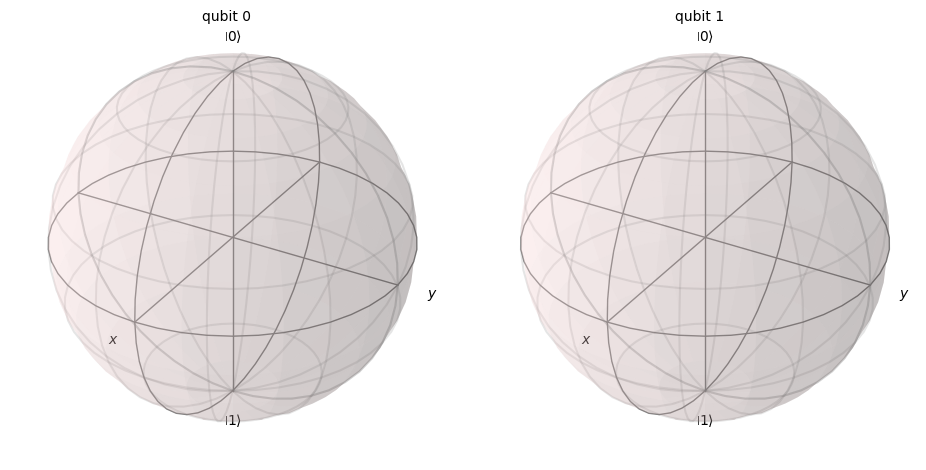

In [90]:
job_bell = simulator.run(qc_bell, shots=1024)
result_bell = job_bell.result()

state_bell = result_bell.data()['statevector']

display(plot_bloch_multivector(state_bell))

Visualização Global (Q-Sphere) do Estado de Bell:


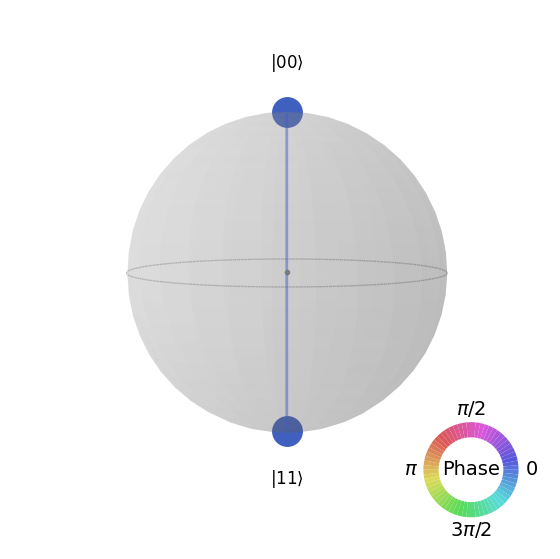

In [91]:
print("Visualização Global (Q-Sphere) do Estado de Bell:")
display(plot_state_qsphere(state_bell))


Contagem dos resultados do Estado de Bell: {'00': 535, '11': 489}


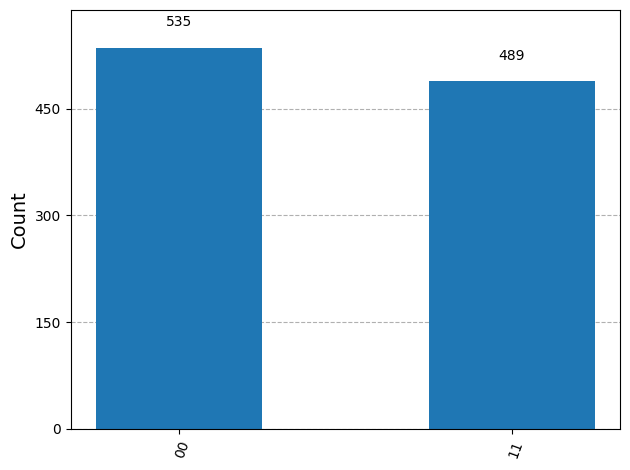

In [92]:
counts_bell = result_bell.get_counts(qc_bell)

print("\nContagem dos resultados do Estado de Bell:", counts_bell)

plot_histogram(counts_bell)